In [1]:
import pandas as pd
import seaborn as sns

In [2]:
simulation_data_file = "../gym_ACAS2D/models/logs/testing_ACAS2D_PPO_1048576_1_100.csv"

In [3]:
simulation = pd.read_csv(simulation_data_file)

In [4]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [5]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [6]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal,Path
0,1,Goal,1270.424430,678,812.4,209.321488,95.457349,"[(48, 400.0), (49.19797856699598, 400.06962293..."
1,2,Timeout,60.384696,1200,1438.8,156.392953,588.862851,"[(48, 400.0), (49.199751978442485, 399.9756034..."
2,3,Goal,1154.803824,818,980.4,190.833183,95.980391,"[(48, 400.0), (49.1975685372332, 400.076351808..."
3,4,Goal,1328.525641,651,780.0,236.414831,95.420749,"[(48, 400.0), (49.19512953266761, 400.10800648..."
4,5,Goal,1226.415405,702,841.2,199.063179,95.761676,"[(48, 400.0), (49.199959352565244, 399.9901231..."


In [7]:
simulation.describe()

,Episode,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,983.955204,820.360000,983.232000,192.397662,162.337850
std,29.011492,476.962836,207.361906,248.834287,21.081436,149.736342
min,1.000000,57.213017,648.000000,776.400000,155.949119,94.826073
25%,25.750000,1154.734358,680.000000,814.800000,179.251663,95.331152
50%,50.500000,1219.994381,712.500000,853.800000,195.279389,95.676329
75%,75.250000,1263.506857,832.000000,997.200000,208.297942,95.979154
max,100.000000,1338.363122,1200.000000,1438.800000,240.149897,605.705324


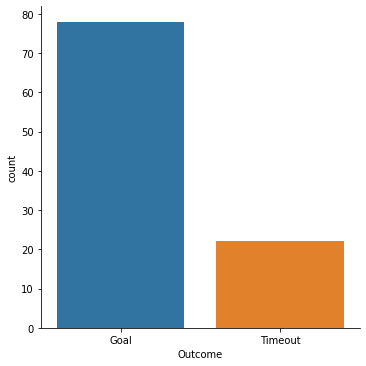

In [8]:
sns.catplot(x="Outcome", data=simulation, kind="count")

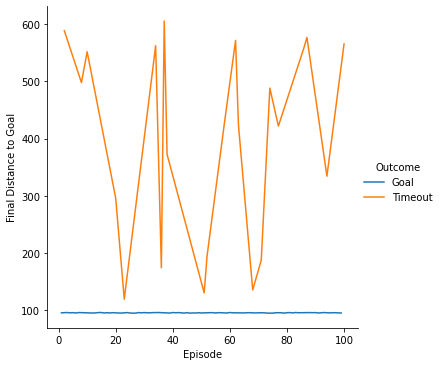

In [9]:
sns.relplot(x="Episode", y="Final Distance to Goal", data=simulation, 
            kind ="line", 
            hue="Outcome")

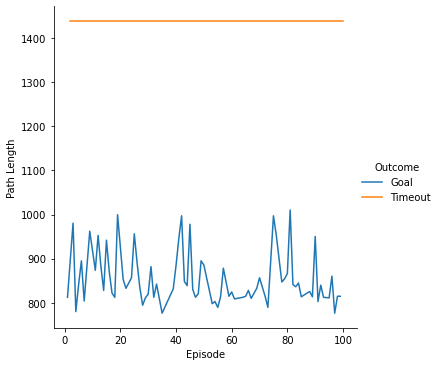

In [10]:
sns.relplot(x="Episode", y="Path Length", data=simulation, 
            kind ="line", 
            hue="Outcome")

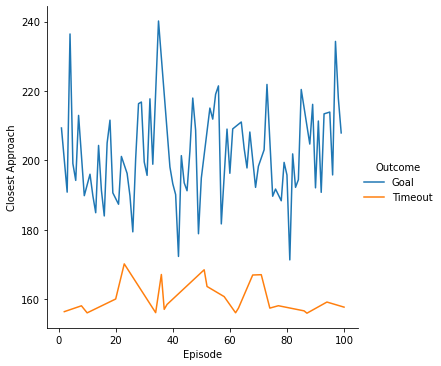

In [11]:
sns.relplot(x="Episode", y="Closest Approach", data=simulation, 
            kind ="line", 
            hue="Outcome")

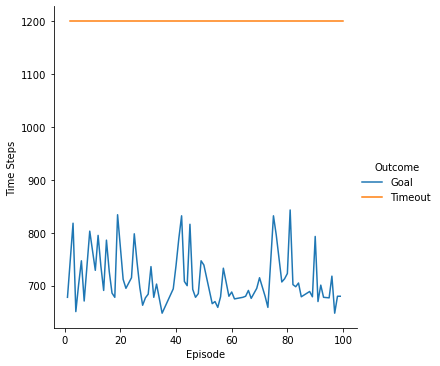

In [12]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome")

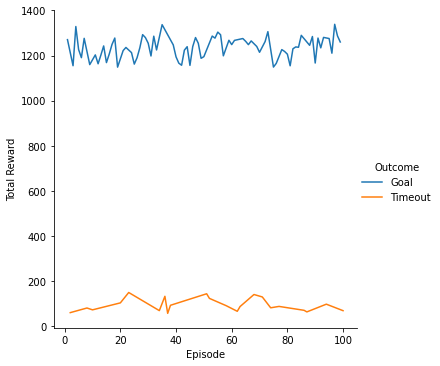

In [13]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome")

In [14]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [15]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82036 entries, 0 to 82035
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  82036 non-null  int64  
 1   Outcome  82036 non-null  object 
 2   x        82036 non-null  float64
 3   y        82036 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ MB


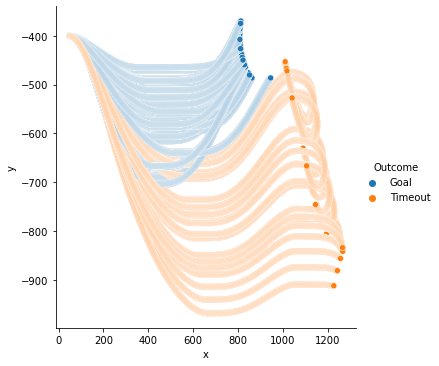

In [16]:
sns.relplot(x="x", y="y", hue="Outcome", kind="scatter", data=paths_df)

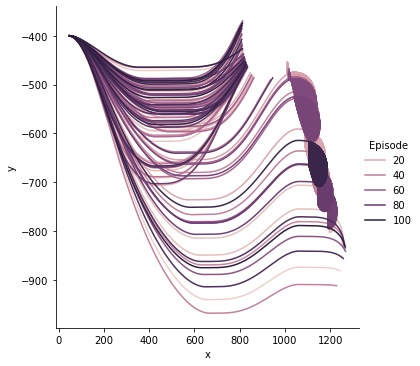

In [17]:
sns.relplot(x="x", y="y", hue="Episode", kind="line", data=paths_df)